## Exploratory Data Analysis (EDA):
Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to understand their main characteristics, often with the help of visualizations.

In [1]:
import numpy as np
import pandas as pd
import sklearn
# Load the dataset
df=pd.read_csv(r'C:\Users\gandl\Downloads\amazon-reviews-unlocked-mobile-phones\Amazon_Unlocked_Mobile.csv')
# Check the first few rows to understand the structure of the dataset
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [2]:
df['Rating'].value_counts()

Rating
5    223605
1     72350
4     61392
3     31765
2     24728
Name: count, dtype: int64

In [3]:
df.shape

(413840, 6)

In [4]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None


## Finding Missing Values
Refers to one of the statistical measures of central tendency that represents the average of a dataset.

In [5]:
# Check for any missing values
print(df.isnull().sum())

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64


In [6]:
# Check unique values in 'Reviews' column to see if it contains any unexpected text or mixed types
print(df['Reviews'].unique())

["I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!"
 'nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung'
 'Very pleased' ...
 "Pros...Works great, very durable, easy to navigate, speaker is fantastic!Only negative is that flip phones just aren't for me."
 'just as described perfect for the price'
 "Speaker phone doesn't work, but phone works good"]


## Handling Missing Values


In [7]:
# Convert the 'Reviews' column to a string type before filling missing values
df['Reviews'] = df['Reviews'].astype(str)

# Fill missing values
df['Brand Name'] = df['Brand Name'].fillna('Unknown')
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Reviews'] = df['Reviews'].fillna('No Review')
df['Review Votes'] = df['Review Votes'].fillna(df['Review Votes'].median())

# Verify that missing values have been handled
print(df.isnull().sum())

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64


# Standardization of data:
##### is a preprocessing step in machine learning that involves transforming data to have a mean of 0 and a standard deviation of 1. 

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization to numerical columns
df[['Price', 'Review Votes']] = scaler.fit_transform(df[['Price', 'Review Votes']])
print(df[['Price', 'Review Votes']].head())

      Price  Review Votes
0 -0.094755     -0.051211
1 -0.094755     -0.161950
2 -0.094755     -0.161950
3 -0.094755     -0.161950
4 -0.094755     -0.161950


# Removing Outliers: 
#### Using the IQR method, rows with outliers are removed.

In [9]:
import pandas as pd

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')  # Load your data

# Calculate the Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[['Price', 'Review Votes']].quantile(0.25)
Q3 = df[['Price', 'Review Votes']].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Remove rows where any of the values are outside the IQR
df_cleaned = df[~((df[['Price', 'Review Votes']] < (Q1 - 1.5 * IQR)) | 
                  (df[['Price', 'Review Votes']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the cleaned DataFrame
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")


Original data shape: (413840, 6)
Cleaned data shape: (342268, 6)


# Capping Outliers:
#### You can cap values to the maximum or minimum threshold, making extreme values more manageable.

In [10]:
# Capping the outliers
df['Price'] = df['Price'].clip(lower=Q1['Price'] - 1.5 * IQR['Price'], 
                                upper=Q3['Price'] + 1.5 * IQR['Price'])

df['Review Votes'] = df['Review Votes'].clip(lower=Q1['Review Votes'] - 1.5 * IQR['Review Votes'],
                                               upper=Q3['Review Votes'] + 1.5 * IQR['Review Votes'])

# Display the capped DataFrame
print(f"Data after capping outliers:\n{df[['Price', 'Review Votes']].describe()}")


Data after capping outliers:
               Price   Review Votes
count  413840.000000  413840.000000
mean       -0.100586      -0.105652
std         0.587328       0.095795
min        -0.825755      -0.161950
25%        -0.537204      -0.161950
50%        -0.298577      -0.161950
75%         0.160058      -0.051211
max         1.205952       0.114896


# Feature Engineering: 
#### Add a New Feature - Review Length

In [11]:
df['Review Length'] = df['Reviews'].apply(lambda x: len(x.split()))

# Display the first few rows of the dataset
print(df[['Reviews', 'Review Length']].head())

                                             Reviews  Review Length
0  I feel so LUCKY to have found this used (phone...             72
1  nice phone, nice up grade from my pantach revu...             40
2                                       Very pleased              2
3  It works good but it goes slow sometimes but i...             17
4  Great phone to replace my lost phone. The only...             43


#### Add a New Feature - Character Count

In [12]:
# Add a new column for character count
df['Character Count'] = df['Reviews'].apply(len)

# Display the first few rows
print(df[['Reviews', 'Character Count']].head())

                                             Reviews  Character Count
0  I feel so LUCKY to have found this used (phone...              374
1  nice phone, nice up grade from my pantach revu...              214
2                                       Very pleased               12
3  It works good but it goes slow sometimes but i...               76
4  Great phone to replace my lost phone. The only...              223


#### Convert Reviews to Lowercase

In [13]:
# Convert reviews to lowercase
df['Cleaned Reviews'] = df['Reviews'].str.lower()

# Display the first few rows
print(df[['Reviews', 'Cleaned Reviews']].head())

                                             Reviews  \
0  I feel so LUCKY to have found this used (phone...   
1  nice phone, nice up grade from my pantach revu...   
2                                       Very pleased   
3  It works good but it goes slow sometimes but i...   
4  Great phone to replace my lost phone. The only...   

                                     Cleaned Reviews  
0  i feel so lucky to have found this used (phone...  
1  nice phone, nice up grade from my pantach revu...  
2                                       very pleased  
3  it works good but it goes slow sometimes but i...  
4  great phone to replace my lost phone. the only...  


#### Remove Stopwords

In [14]:
from nltk.corpus import stopwords

# Download NLTK stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

# Display the first few rows
print(df[['Reviews', 'Cleaned Reviews']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gandl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gandl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             Reviews  \
0  I feel so LUCKY to have found this used (phone...   
1  nice phone, nice up grade from my pantach revu...   
2                                       Very pleased   
3  It works good but it goes slow sometimes but i...   
4  Great phone to replace my lost phone. The only...   

                                     Cleaned Reviews  
0  feel lucky found used (phone us & used hard al...  
1  nice phone, nice grade pantach revue. clean se...  
2                                            pleased  
3     works good goes slow sometimes good phone love  
4  great phone replace lost phone. thing volume b...  


### Tokenization

In [15]:
# Tokenize each review
df['Tokenized Reviews'] = df['Cleaned Reviews'].apply(lambda x: x.split())

# Display the first few rows
print(df[['Cleaned Reviews', 'Tokenized Reviews']].head())

                                     Cleaned Reviews  \
0  feel lucky found used (phone us & used hard al...   
1  nice phone, nice grade pantach revue. clean se...   
2                                            pleased   
3     works good goes slow sometimes good phone love   
4  great phone replace lost phone. thing volume b...   

                                   Tokenized Reviews  
0  [feel, lucky, found, used, (phone, us, &, used...  
1  [nice, phone,, nice, grade, pantach, revue., c...  
2                                          [pleased]  
3  [works, good, goes, slow, sometimes, good, pho...  
4  [great, phone, replace, lost, phone., thing, v...  


### Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize each review (in the 'Cleaned Reviews' column)
df['Lemmatized Reviews'] = df['Cleaned Reviews'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

# Display the first few rows to check the result
print(df[['Reviews', 'Cleaned Reviews', 'Lemmatized Reviews']].head())

                                             Reviews  \
0  I feel so LUCKY to have found this used (phone...   
1  nice phone, nice up grade from my pantach revu...   
2                                       Very pleased   
3  It works good but it goes slow sometimes but i...   
4  Great phone to replace my lost phone. The only...   

                                     Cleaned Reviews  \
0  feel lucky found used (phone us & used hard al...   
1  nice phone, nice grade pantach revue. clean se...   
2                                            pleased   
3     works good goes slow sometimes good phone love   
4  great phone replace lost phone. thing volume b...   

                                  Lemmatized Reviews  
0  feel lucky found used (phone u & used hard all...  
1  nice phone, nice grade pantach revue. clean se...  
2                                            pleased  
3        work good go slow sometimes good phone love  
4  great phone replace lost phone. thing volume b..

## Vectorization (TF-IDF)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['Lemmatized Reviews'])
print(X_tfidf.shape)

(413840, 1000)


In [18]:
# Assuming you have a cleaned/reviewed DataFrame with review texts
from textblob import TextBlob

# Function to assign sentiment based on the polarity of the review
def assign_sentiment(review):
    blob = TextBlob(review)
    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to the 'Reviews' column to create a 'sentiment' column
df['sentiment'] = df['Lemmatized Reviews'].apply(assign_sentiment)

# Check if the 'sentiment' column is correctly created
print(df[['Lemmatized Reviews', 'sentiment']].head(10))


                                  Lemmatized Reviews sentiment
0  feel lucky found used (phone u & used hard all...  Positive
1  nice phone, nice grade pantach revue. clean se...  Positive
2                                            pleased  Positive
3        work good go slow sometimes good phone love  Positive
4  great phone replace lost phone. thing volume b...  Positive
5  already phone problems... know stated used, da...  Positive
6  charging port loose. got soldered in. needed n...  Positive
7  phone look good stay charged, buy new battery....  Positive
8  originally using samsung s2 galaxy sprint want...  Positive
9  battery life great. responsive touch. issue so...  Positive


### print(df.columns)

### Plotting based on sentiment

<AxesSubplot:xlabel='sentiment'>

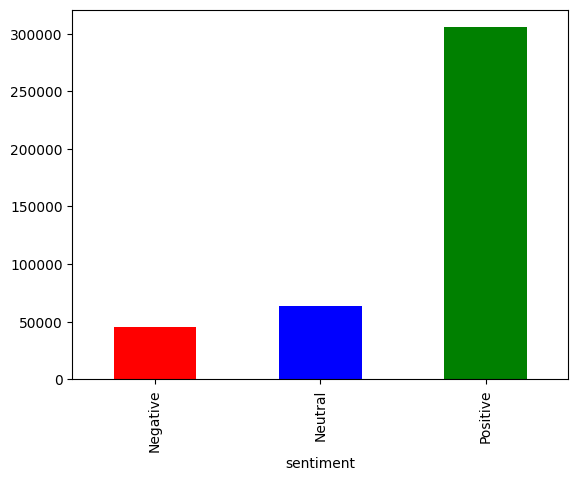

In [20]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green'])

### Model Selection and Training (SVM & Naive Bayes)

#### a. Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split
df_small = df.sample(frac=0.1, random_state=42)
X = vectorizer.transform(df_small['Lemmatized Reviews'])  # Features: Reviews text (input data)
y = df_small['sentiment'] 
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shape of the training and test datasets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (33107, 1000), Test set shape: (8277, 1000)


#### c. Naive Bayes Classifier.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Assuming 'df' is the DataFrame containing the data
# Use only a subset of the data for faster testing (10% of the data)
df_small = df.sample(frac=0.1, random_state=42)

# Vectorizing the text data using the smaller subset
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['Lemmatized Reviews'])

X_tfidf_small = vectorizer.fit_transform(df_small['Reviews'])  # Convert text to features

# Split the dataset into training and test sets using the same smaller dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_small, df_small['sentiment'], test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nbc_model = MultinomialNB()

# Train the Naive Bayes model
nbc_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nbc = nbc_model.predict(X_test)

# Evaluate the performance of the Naive Bayes model
print("Naive Bayes Classifier Performance:")
print(classification_report(y_test, y_pred_nbc))


# Confusion Matrix for Naive Bayes
print("Confusion Matrix for Naive Bayes:\n", confusion_matrix(y_test, y_pred_nbc))

Naive Bayes Classifier Performance:
              precision    recall  f1-score   support

    Negative       0.80      0.28      0.42       874
     Neutral       0.88      0.34      0.49      1260
    Positive       0.81      0.99      0.89      6143

    accuracy                           0.81      8277
   macro avg       0.83      0.54      0.60      8277
weighted avg       0.82      0.81      0.78      8277

Confusion Matrix for Naive Bayes:
 [[ 246   17  611]
 [  15  434  811]
 [  47   44 6052]]


#### b. Support Vector Machine (SVM) Classifier

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming 'df' is the DataFrame containing the data
# Use only a subset of the data for faster testing (10% of the data)
df_small = df.sample(frac=0.1, random_state=42)

# Vectorizing the text data using the smaller subset
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=3000, stop_words='english')
X_tfidf_small = vectorizer.fit_transform(df_small['Lemmatized Reviews'])  # Convert text to features

# Split the dataset into training and test sets using the same smaller dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_small, df_small['sentiment'], test_size=0.2, random_state=42)

# Initialize the SVM classifier with a linear kernel
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the performance of the SVM model
print("SVM Classifier Performance:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))

SVM Classifier Performance:
              precision    recall  f1-score   support

    Negative       0.89      0.75      0.82       874
     Neutral       0.89      0.93      0.91      1260
    Positive       0.96      0.97      0.97      6143

    accuracy                           0.94      8277
   macro avg       0.91      0.88      0.90      8277
weighted avg       0.94      0.94      0.94      8277

Confusion Matrix for SVM:
 [[ 657   42  175]
 [  17 1168   75]
 [  61  106 5976]]


#### Prediction of the SVM Model

In [28]:
def predict_sentiment(review):
    # Transform the review text into the same feature format used for training
    review_tfidf = vectorizer.transform([review])  # Convert the review into numerical features
    sentiment = svm_model.predict(review_tfidf)  # Make prediction
    return sentiment[0]  # Return the prediction (first element)

# Example review for prediction
review = "The noise cancellation is almost non-existent, making them unsuitable for noisy environments."  # You can change this to any review you want
prediction = predict_sentiment(review)

print(f"Prediction for '{review}': {prediction}")

Prediction for 'The noise cancellation is almost non-existent, making them unsuitable for noisy environments.': Neutral


In [25]:
import pickle
with open("sentiment_analyser.pkl", "wb") as model_file:
    pickle.dump(svm_model, model_file)

# Save the vectorizer
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("Sentiment model and vectorizer saved successfully!")

Sentiment model and vectorizer saved successfully!


In [26]:
def predict_sentiment_review(reviews, svm_model, vectorizer):
    # Process the reviews and vectorize them
    review_vector = vectorizer.transform(reviews)
    prediction = svm_model.predict(review_vector)
    
    # Return the sentiment based on prediction (e.g., 1=positive, -1=negative, 0=neutral)
    if prediction == 2:
        return "Buy"
    elif prediction == 0:
        return "Don't Buy"
    else:
        return "Neutral"
